In [265]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "car-price-dataset"

# **Import**
-----------------------------

In [266]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & EDA**
-------------------------

In [267]:
df <- read.csv('/kaggle/input/car-price-dataset/car_price_dataset.csv') %>% 
      mutate(across(
        c(
      where(is.character),
      Doors,
      Owner_Count
        ),
            ~ as.factor(.x)
       ))

**Data Description**

--------------------------------------------
* **Brand**: Specifies the brand of the car (e.g., Toyota, BMW, Ford).
Example values: "Toyota", "BMW", "Mercedes".

* **Model**: Specifies the model of the car (e.g., Corolla, Focus, X5).
Example values: "Corolla", "Focus", "X5".

* **Year**: The production year of the car. Newer years typically indicate higher prices.
Example values: 2005, 2018, 2023.

* **Engine_Size**: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.
Example values: 1.6, 2.0, 3.5.

* **Fuel_Type**: indicates the type of fuel used by the car:
Petrol: Cars running on gasoline.
Diesel: Cars running on diesel fuel.
Hybrid: Cars that use both fuel and electricity.
Electric: Fully electric cars.

* **Transmission**: The type of transmission in the car:
Manual: Manual transmission.
Automatic: Automatic transmission.
Semi-Automatic: Semi-automatic transmission.

* **Mileage**: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.
Example values: 15,000, 75,000, 230,000.

* **Doors**: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.
Example values: 2, 3, 4, 5.

* **Owner_Count**: The number of previous owners of the car. Fewer owners generally indicate a higher price.
Example values: 1, 2, 3, 4.

* **Price**:The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.
Example values: 5,000, 15,000, 30,000.

-----------------------

## **Summary**

In [268]:
str(df)

'data.frame':	10000 obs. of  10 variables:
 $ Brand       : Factor w/ 10 levels "Audi","BMW","Chevrolet",..: 7 3 8 1 10 9 5 7 7 9 ...
 $ Model       : Factor w/ 30 levels "3 Series","5 Series",..: 25 20 17 23 18 7 8 27 27 24 ...
 $ Year        : int  2020 2012 2020 2023 2003 2007 2010 2001 2014 2005 ...
 $ Engine_Size : num  4.2 2 4.2 2 2.6 2.7 3.4 4.7 2.6 3.1 ...
 $ Fuel_Type   : Factor w/ 4 levels "Diesel","Electric",..: 1 3 1 2 3 4 2 2 3 4 ...
 $ Transmission: Factor w/ 3 levels "Automatic","Manual",..: 2 1 1 2 3 1 1 3 2 2 ...
 $ Mileage     : int  289944 5356 231440 160971 286618 157889 139584 157495 98700 107724 ...
 $ Doors       : Factor w/ 4 levels "2","3","4","5": 2 1 3 1 2 3 2 1 2 1 ...
 $ Owner_Count : Factor w/ 5 levels "1","2","3","4",..: 5 3 2 1 3 4 1 2 4 5 ...
 $ Price       : int  8501 12092 11171 11780 2867 7242 11208 7950 9926 6545 ...


In [269]:
summary(df)

        Brand           Model           Year       Engine_Size   
 Ford      :1048   Accord  : 365   Min.   :2000   Min.   :1.000  
 Audi      :1038   Fiesta  : 363   1st Qu.:2006   1st Qu.:2.000  
 Volkswagen:1020   Impala  : 355   Median :2012   Median :3.000  
 Honda     :1009   5 Series: 353   Mean   :2012   Mean   :3.001  
 Chevrolet :1003   Tiguan  : 352   3rd Qu.:2017   3rd Qu.:4.000  
 BMW       : 999   Focus   : 351   Max.   :2023   Max.   :5.000  
 (Other)   :3883   (Other) :7861                                 
    Fuel_Type            Transmission     Mileage       Doors    Owner_Count
 Diesel  :2512   Automatic     :3317   Min.   :    25   2:2455   1:2036     
 Electric:2625   Manual        :3372   1st Qu.: 74649   3:2575   2:2020     
 Hybrid  :2453   Semi-Automatic:3311   Median :149587   4:2514   3:1977     
 Petrol  :2410                         Mean   :149239   5:2456   4:1931     
                                       3rd Qu.:223578            5:2036     
          

In [270]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brand*,1,10000,5.45500,2.880869e+00,5.0,5.443750e+00,2.9652,1,10,9,0.0297893662,-1.2200907,2.880869e-02
Model*,2,10000,15.42120,8.648888e+00,15.0,1.541150e+01,10.3782,1,30,29,-0.0006672474,-1.1987756,8.648888e-02
Year,3,10000,2011.54370,6.897699e+00,2012.0,2.011542e+03,8.8956,2000,2023,23,-0.0053170235,-1.1910655,6.897699e-02
Engine_Size,4,10000,3.00056,1.149324e+00,3.0,3.001162e+00,1.4826,1,5,4,-0.0082325190,-1.1969925,1.149324e-02
Fuel_Type*,5,10000,2.47610,1.110834e+00,2.0,2.470125e+00,1.4826,1,4,3,0.0378664686,-1.3421975,1.110834e-02
Transmission*,6,10000,1.99940,8.141658e-01,2.0,1.999250e+00,1.4826,1,3,2,0.0010988670,-1.4915494,8.141658e-03
Mileage,7,10000,149239.11180,8.632235e+04,149587.0,1.491862e+05,110409.2220,25,299947,299922,0.0009184956,-1.1913287,8.632235e+02
Doors*,8,10000,2.49710,1.110097e+00,2.0,2.496375e+00,1.4826,1,4,3,0.0075257137,-1.3418560,1.110097e-02
Owner_Count*,9,10000,2.99110,1.422682e+00,3.0,2.988875e+00,1.4826,1,5,4,0.0156749719,-1.3130335,1.422682e-02


In [271]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             10000 
Number of columns          10    
_______________________          
Column type frequency:           
  factor                   6     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Brand                 0             1 FALSE         10
2 Model                 0             1 FALSE         30
3 Fuel_Type             0             1 FALSE          4
4 Transmission          0             1 FALSE          3
5 Doors                 0             1 FALSE          4
6 Owner_Count           0             1 FALSE          5
  top_counts                                
1 For: 1048, Aud: 1038, Vol: 1020, Hon: 1009
2 Acc: 365, Fie: 363, Imp: 355, 5 S: 353    
3 E

## **Checking Missing Value & Duplicate Value**

In [272]:
na <- data.frame(NaN_Count = colSums(is.na(df)))
na

,NaN_Count
,<dbl>
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0


In [273]:
sum(duplicated(df))

[1] 0

## **Data Check**

In [274]:
head(df)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
2,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
3,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
4,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
5,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
6,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242


In [275]:
tail(df)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
9995,Honda,Civic,2016,2.9,Petrol,Manual,255889,2,2,6682
9996,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9997,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9998,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9999,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084
10000,Volkswagen,Tiguan,2001,2.1,Diesel,Manual,157882,3,3,3342


# **2. Data Visulization**
-----------------------

In [276]:
#numeric cols
num_cols <- {}
for(i in 1:length(df)){
    if(is.numeric(df[[i]]) == T)
        num_cols <- c(num_cols ,colnames(df[i]))
}

#categorical cols
cat_cols <- {}
for(i in 1:length(df)){
    if(is.factor(df[[i]]) == T)
        cat_cols <- c(cat_cols ,colnames(df[i]))
}

In [277]:
cat('Numeric columns:',num_cols,'\nCategorical columns:',cat_cols)

Numeric columns: Year Engine_Size Mileage Price 
Categorical columns: Brand Model Fuel_Type Transmission Doors Owner_Count

## **Histogram & Boxplot & Densityplot**

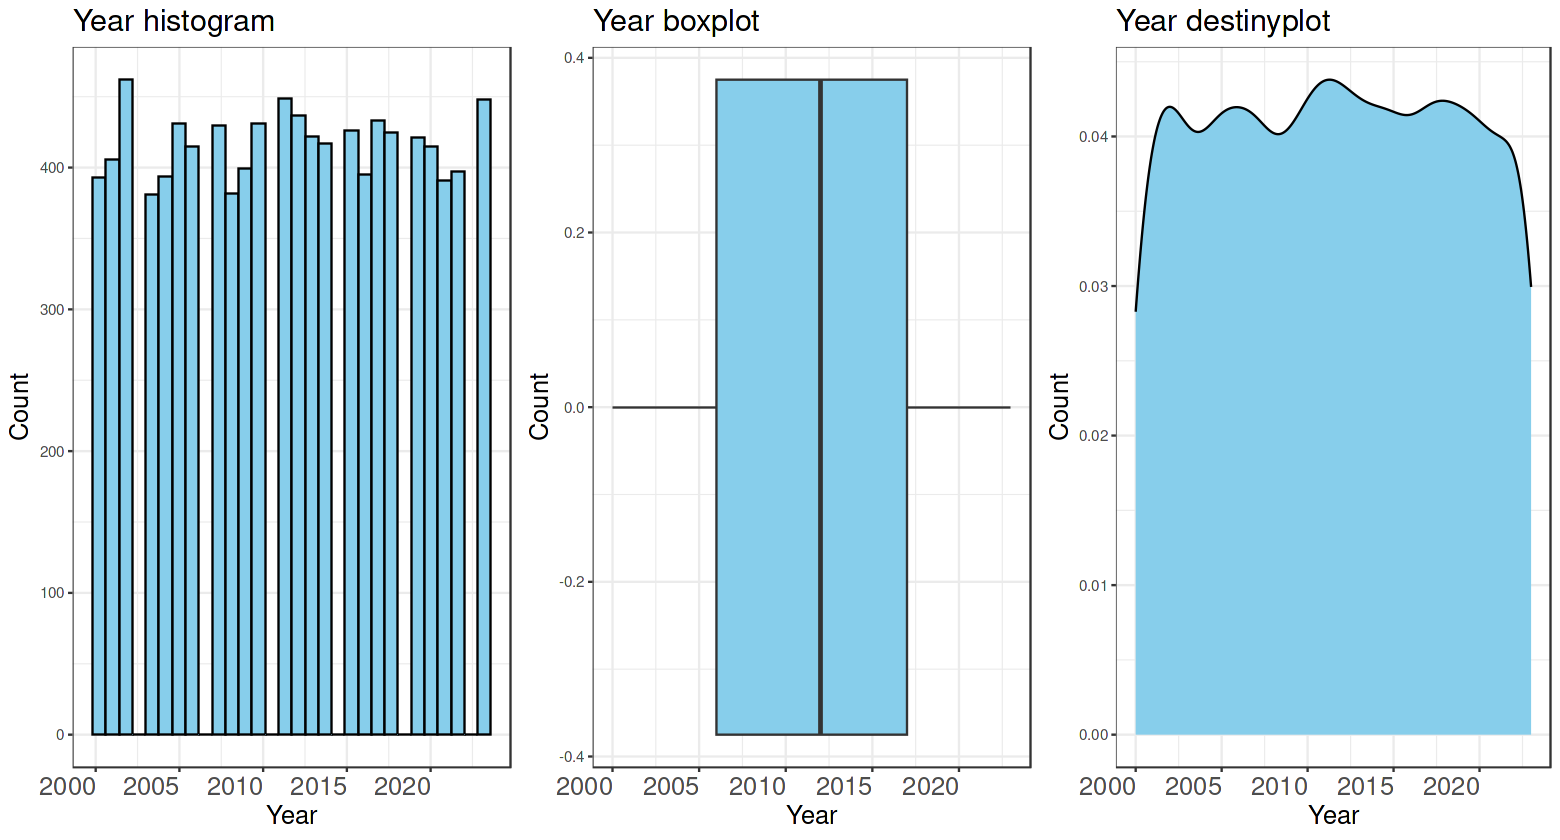

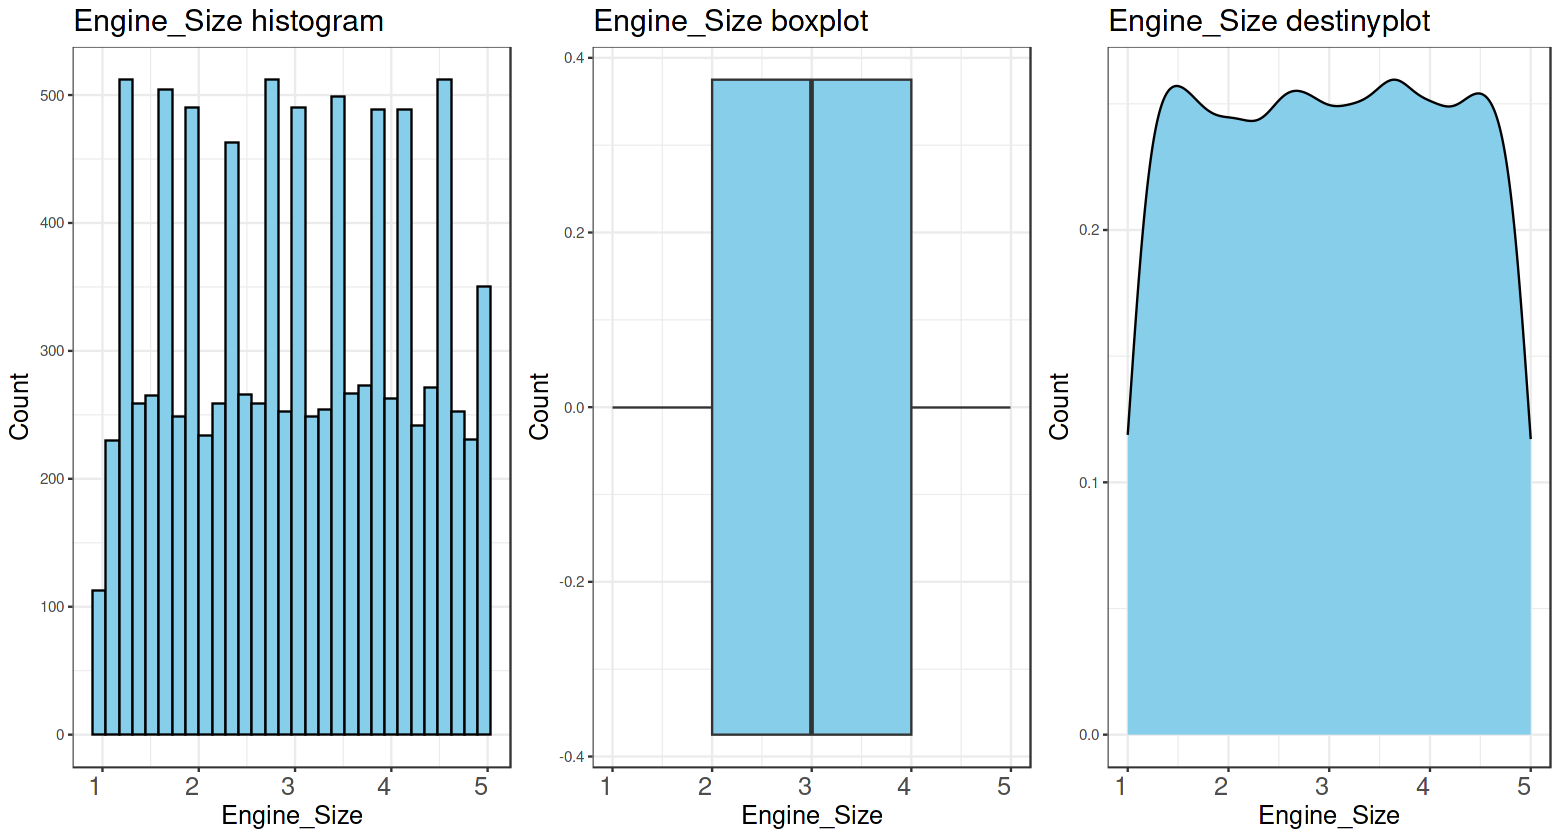

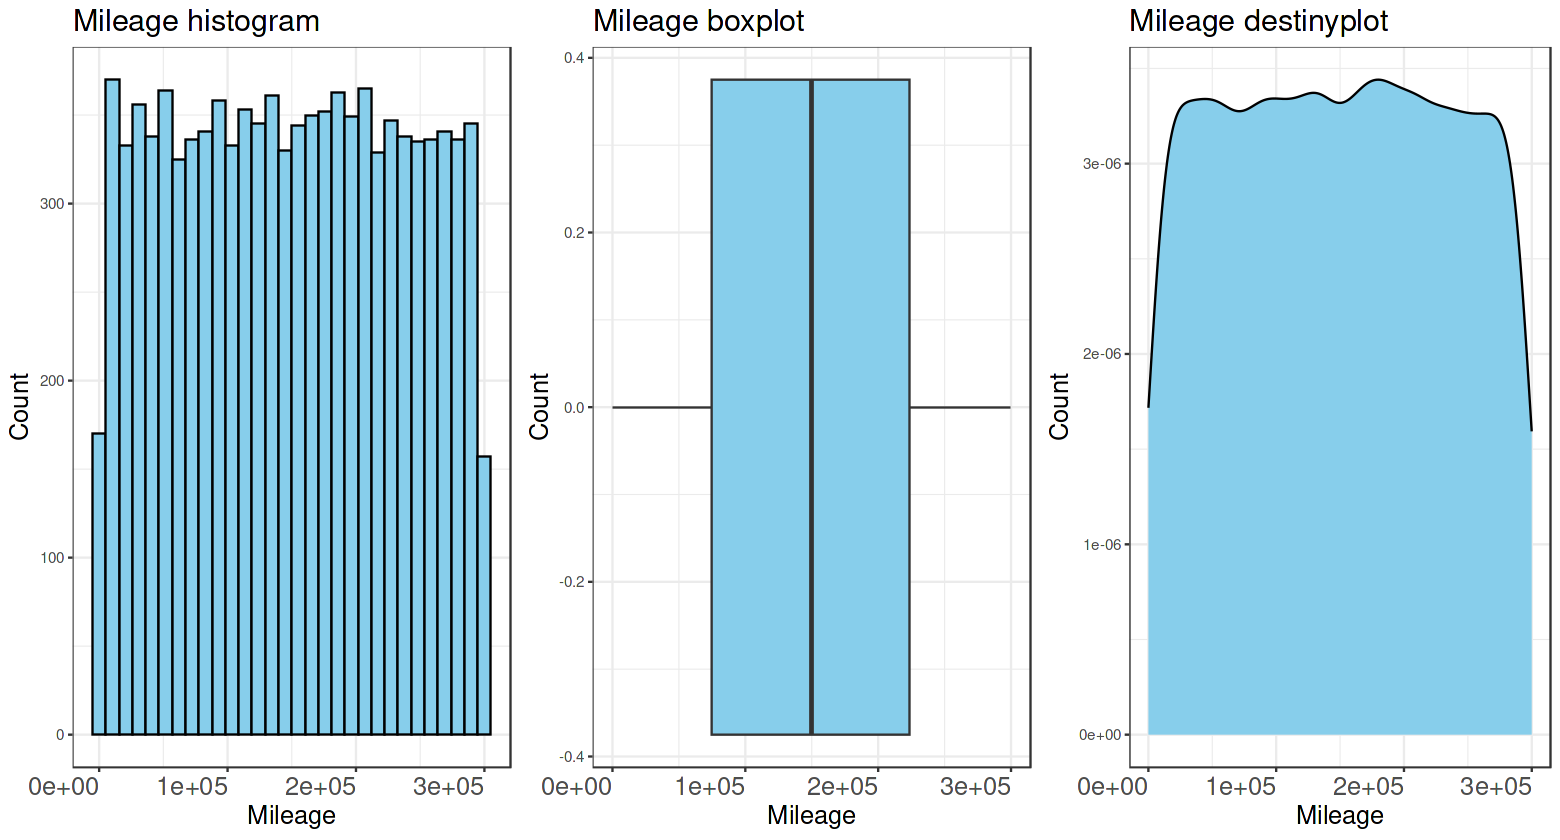

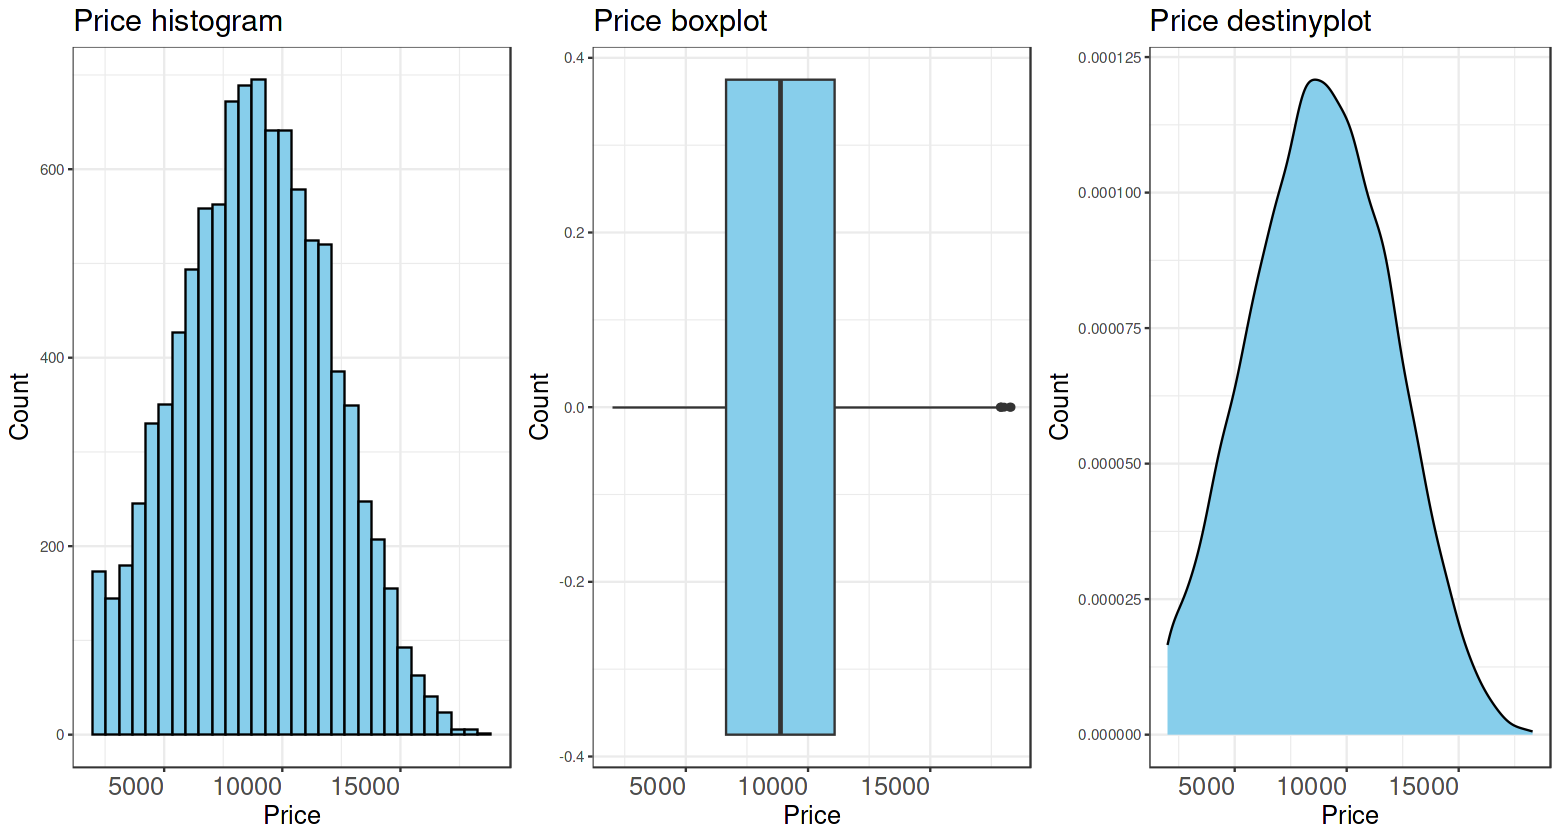

In [278]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **Correlation**

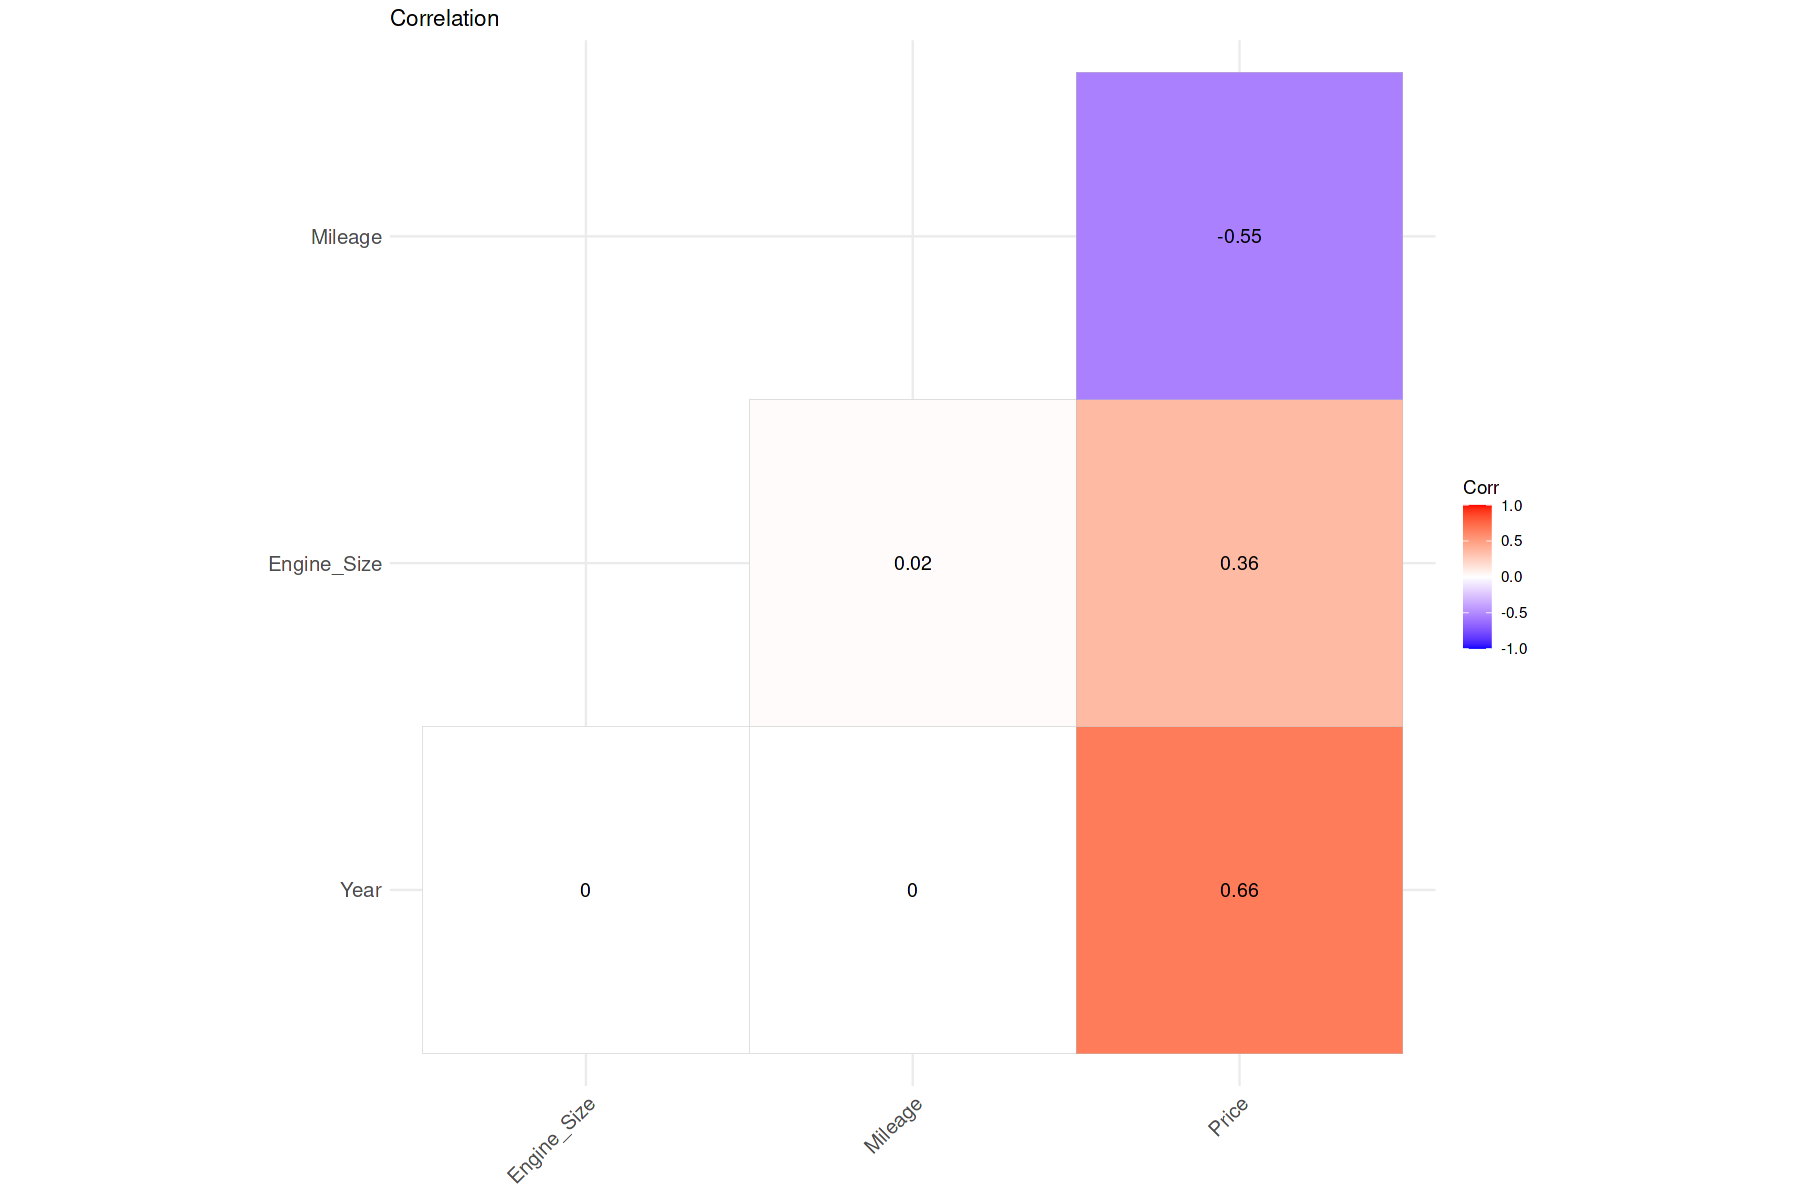

In [279]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

## **Count Plot**

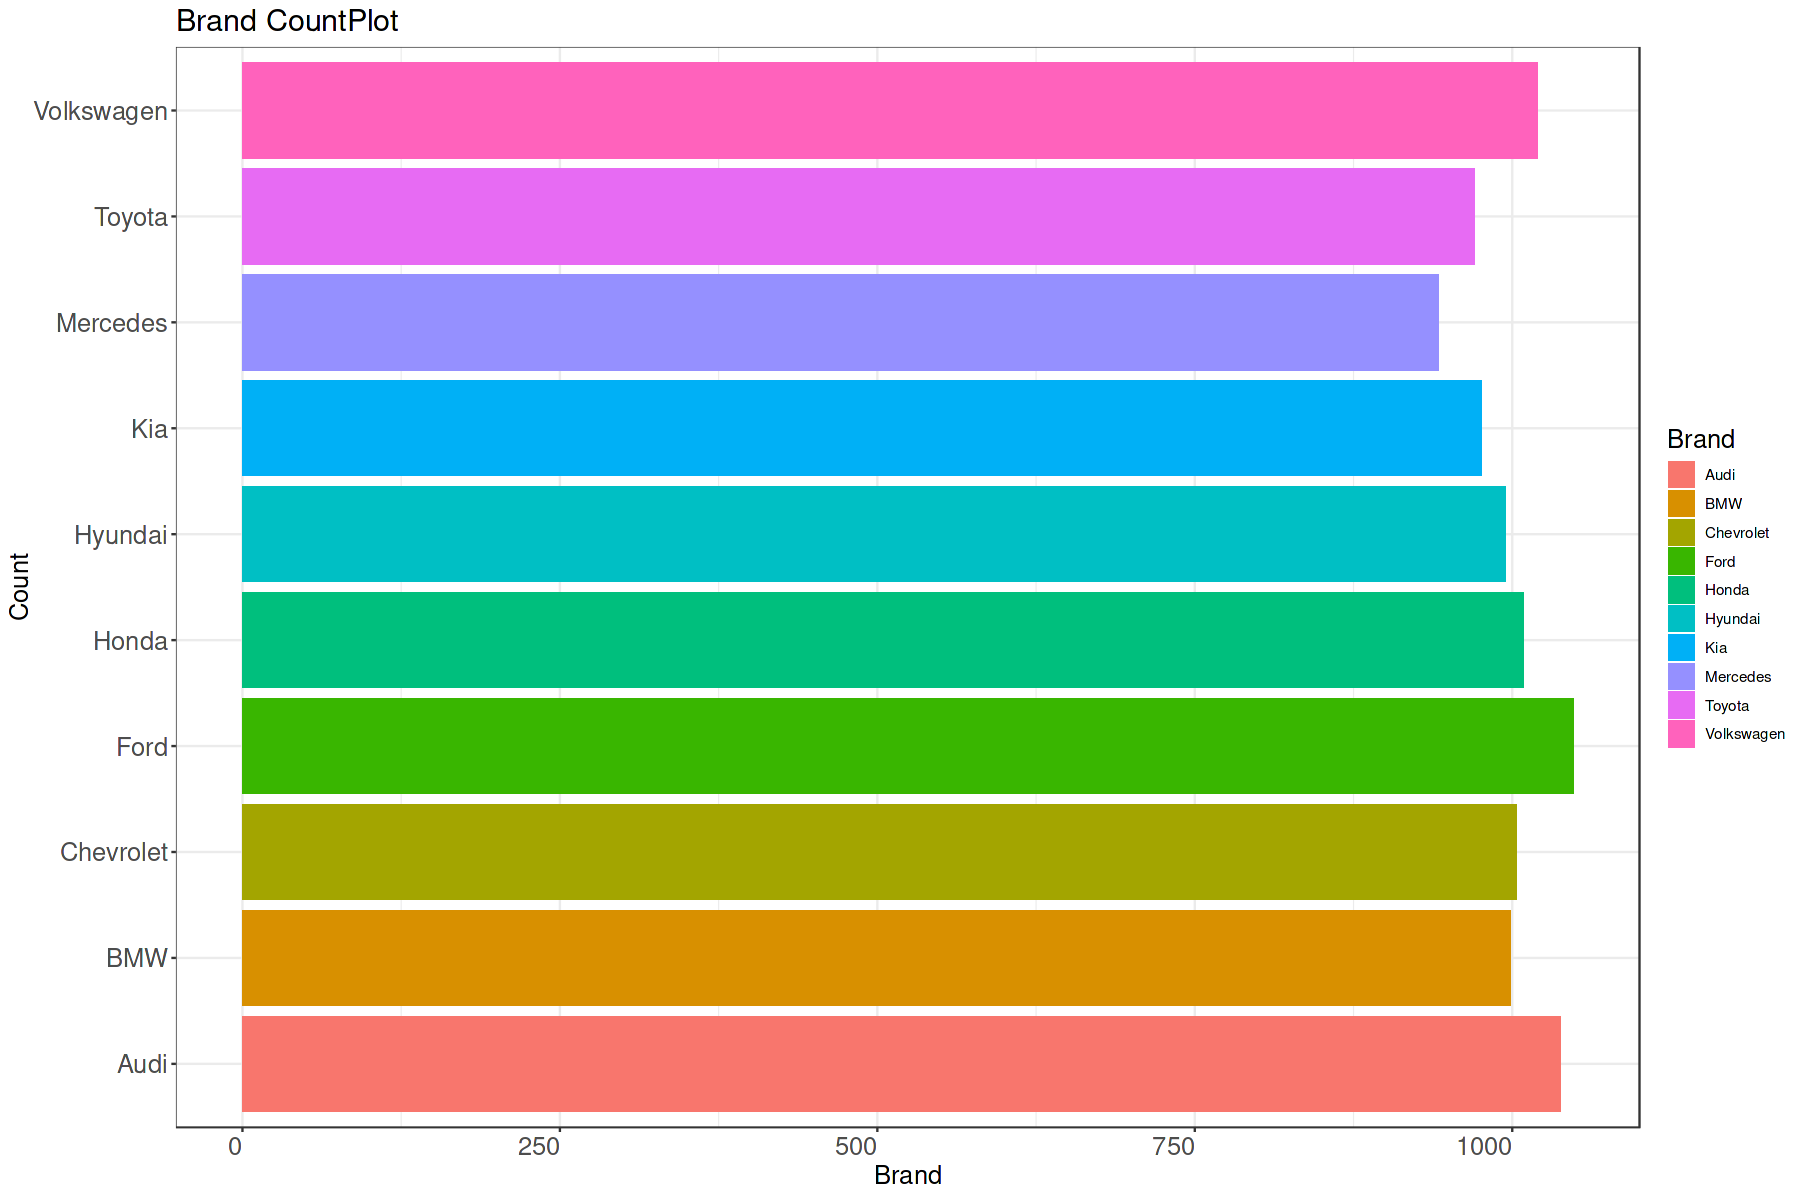

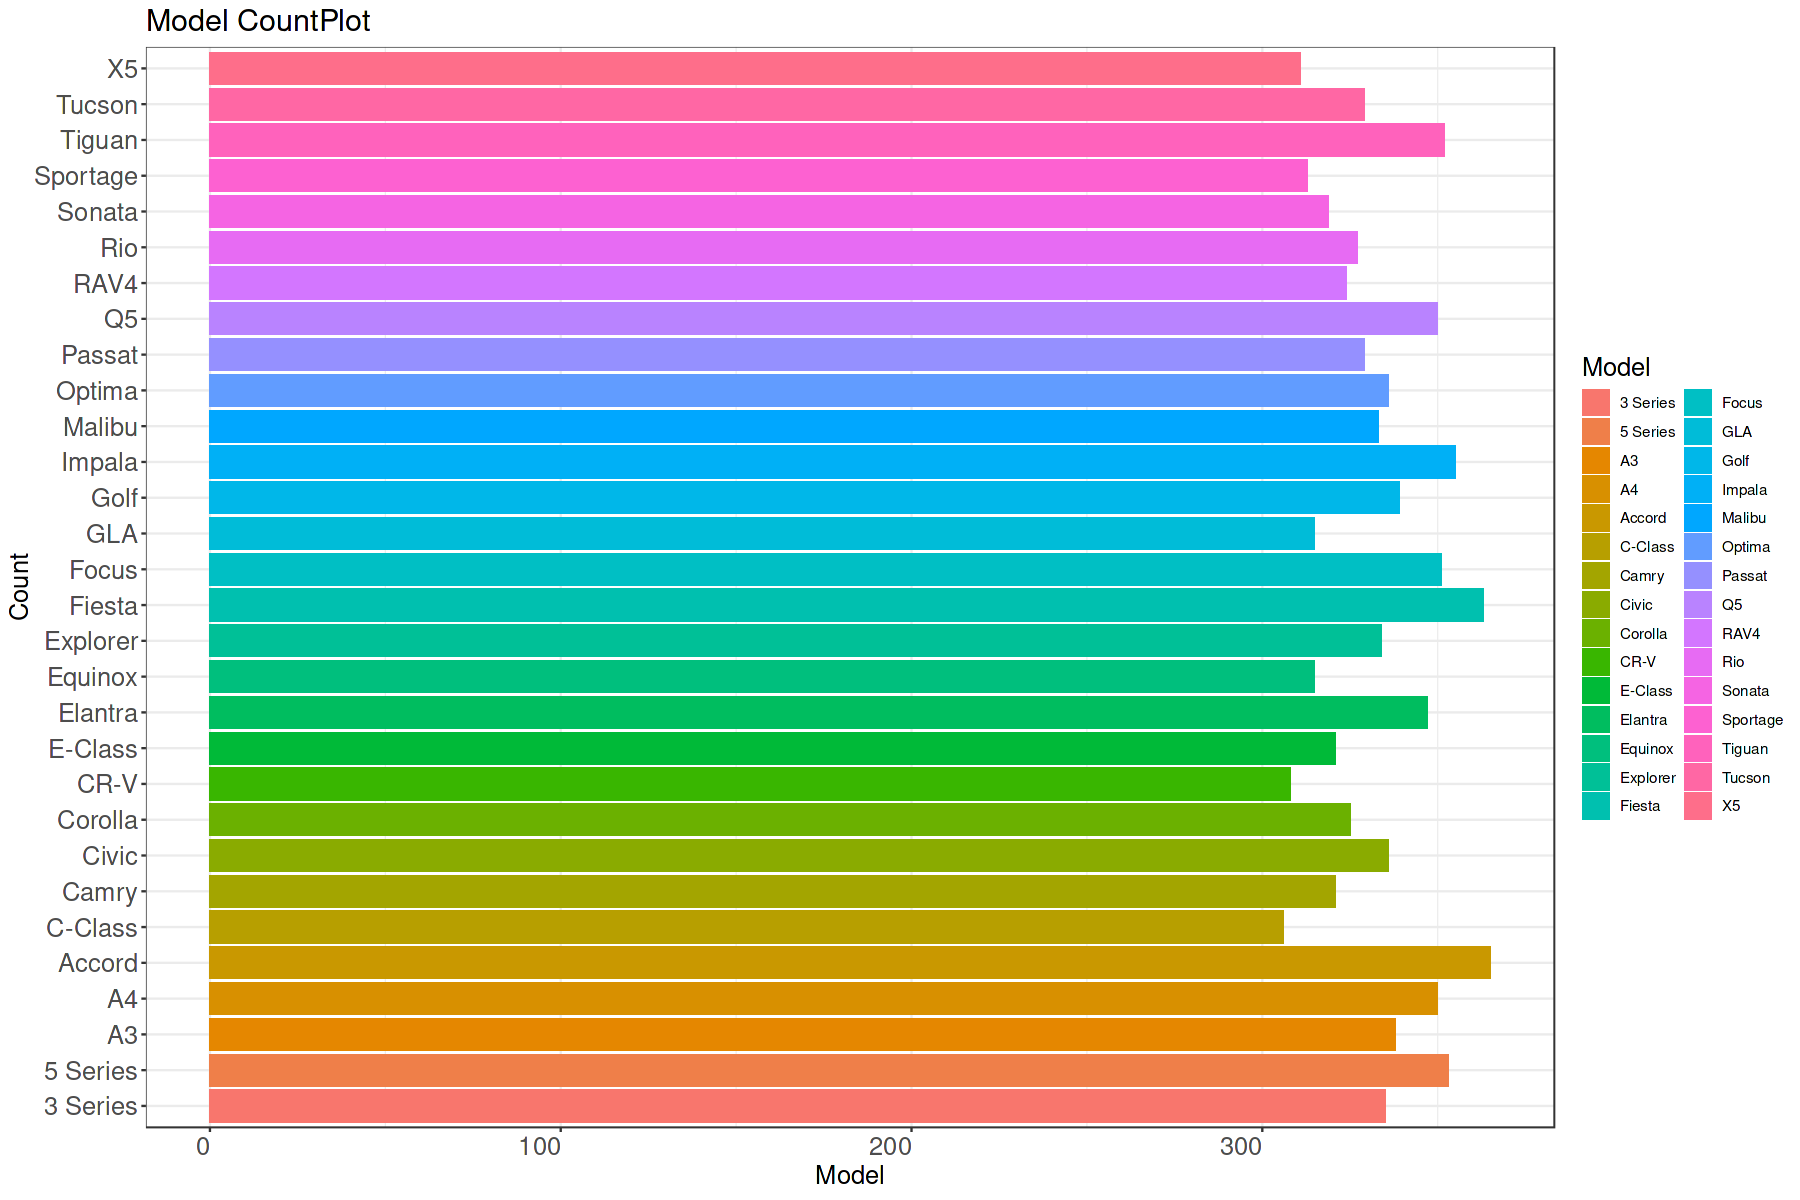

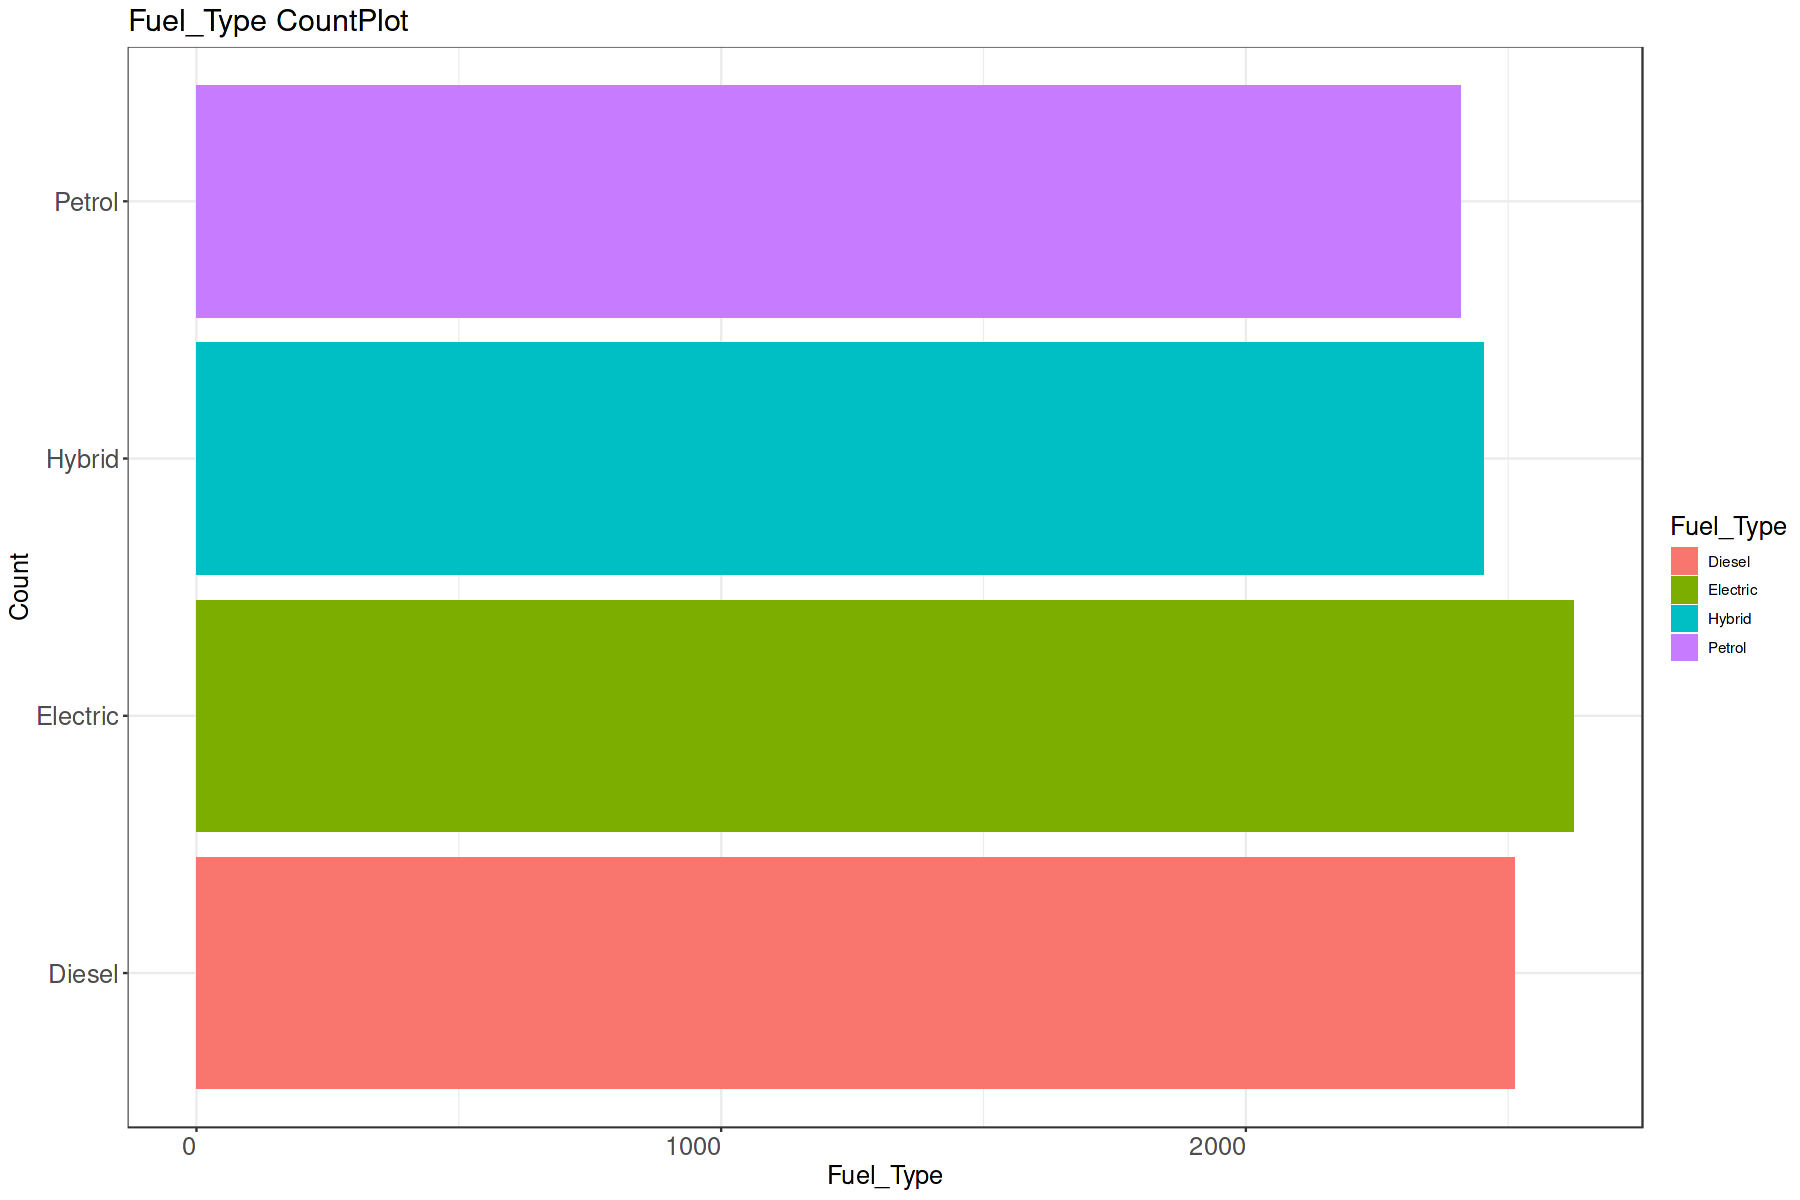

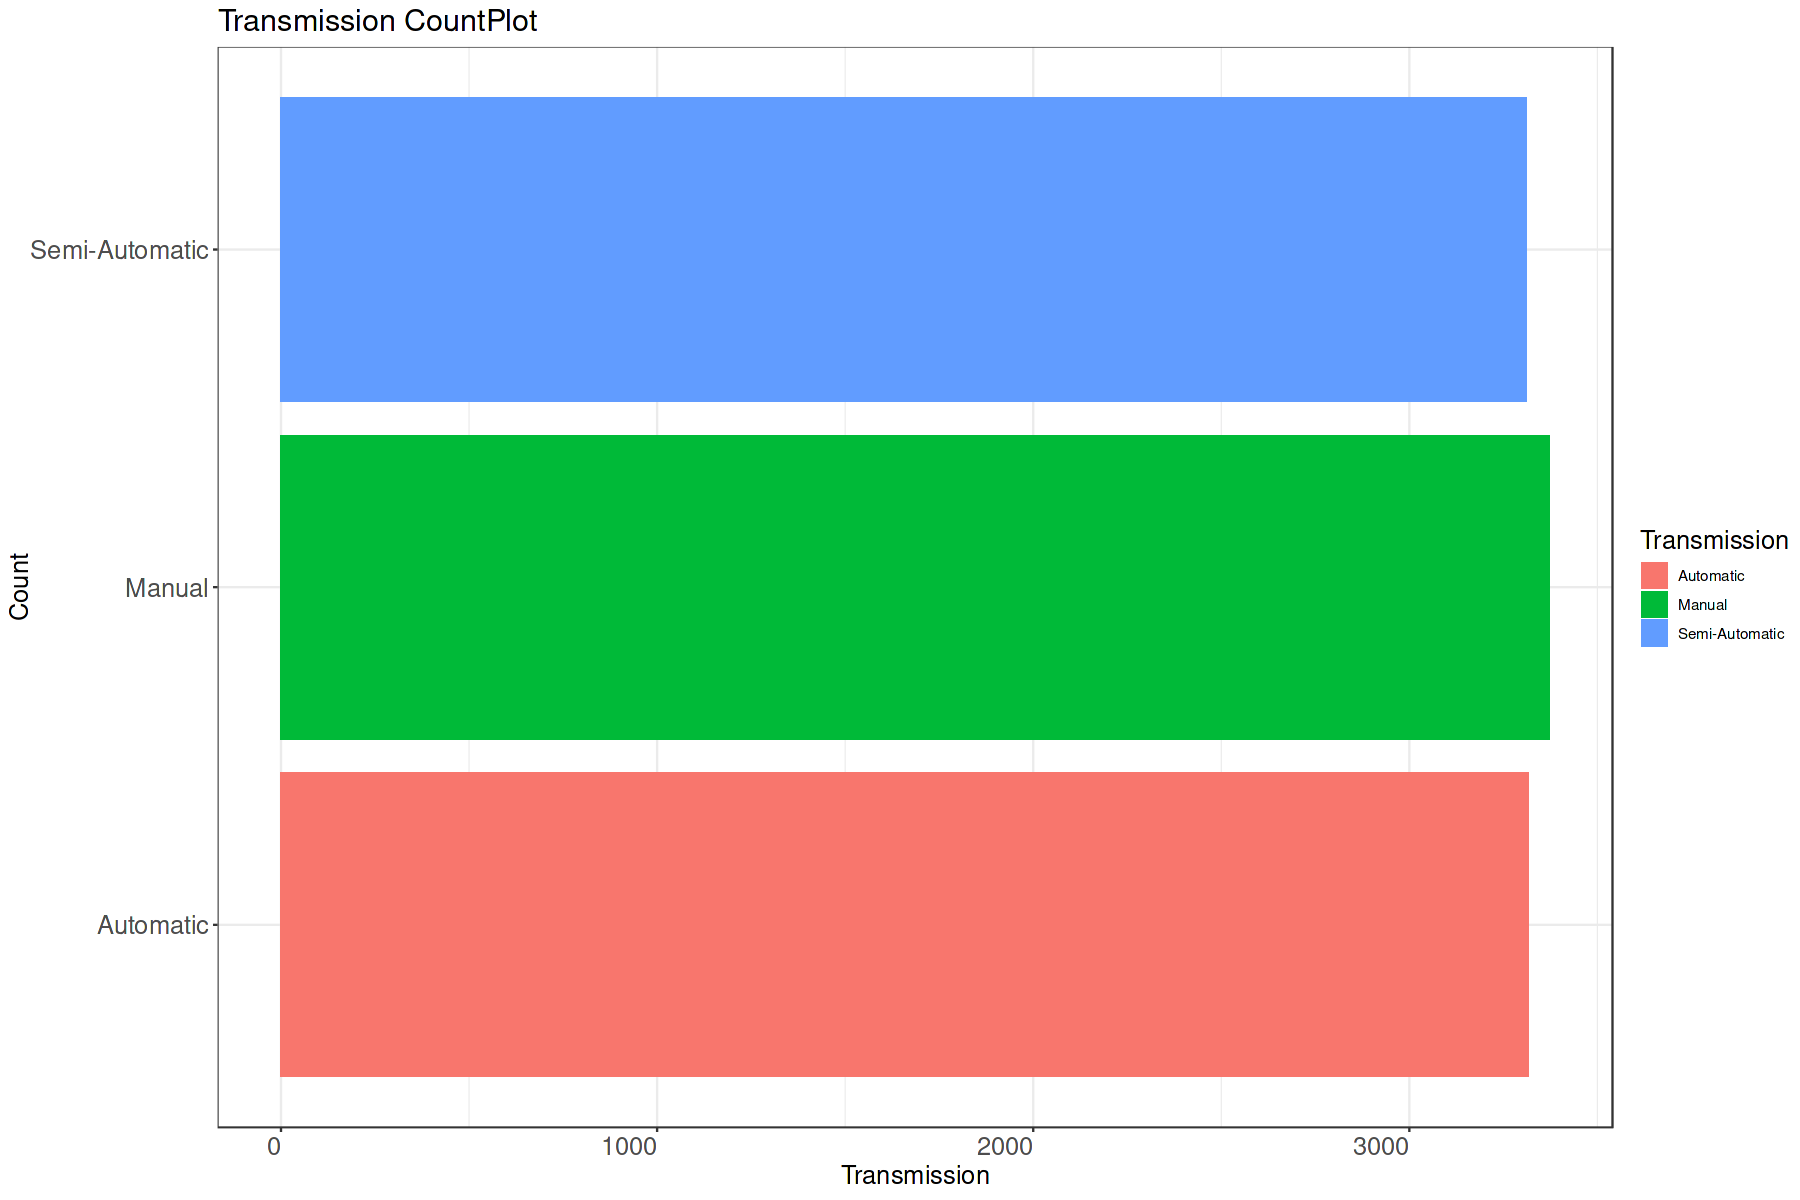

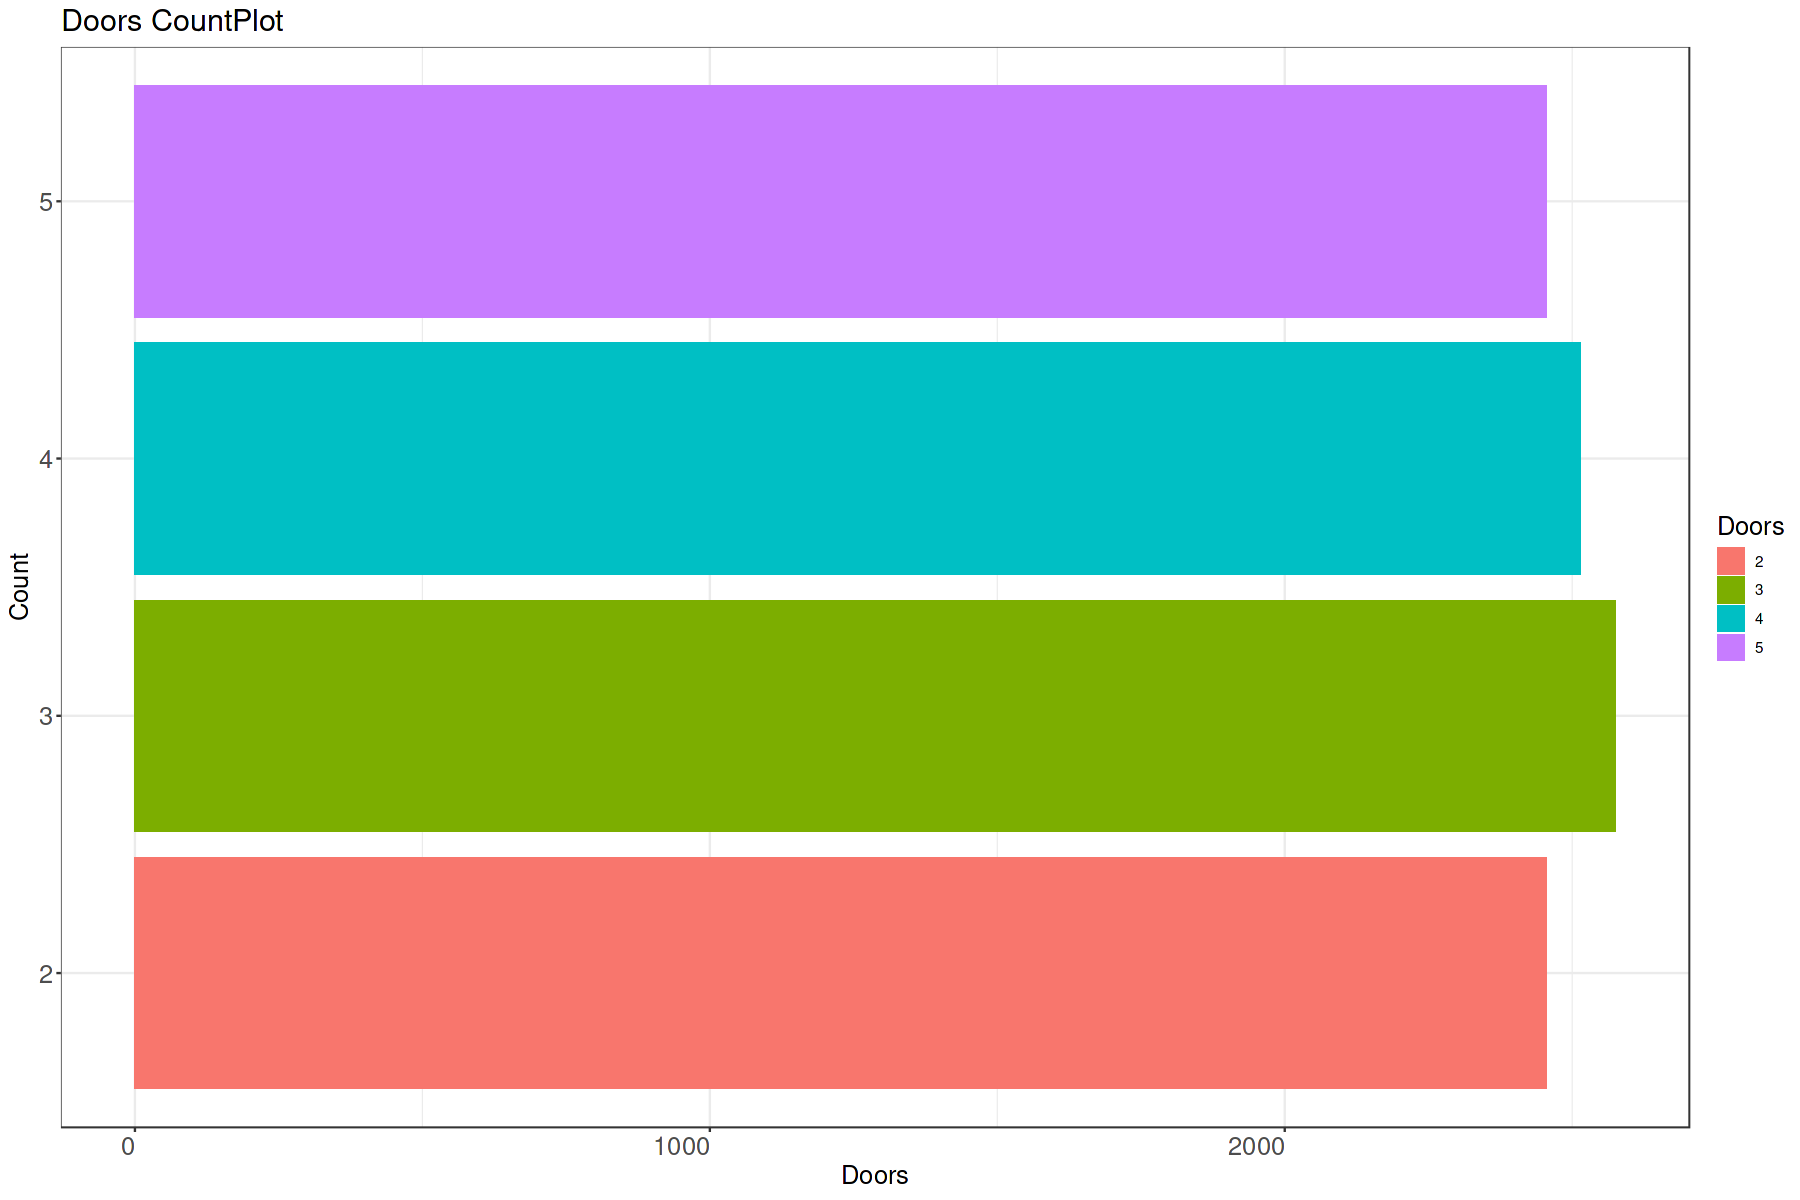

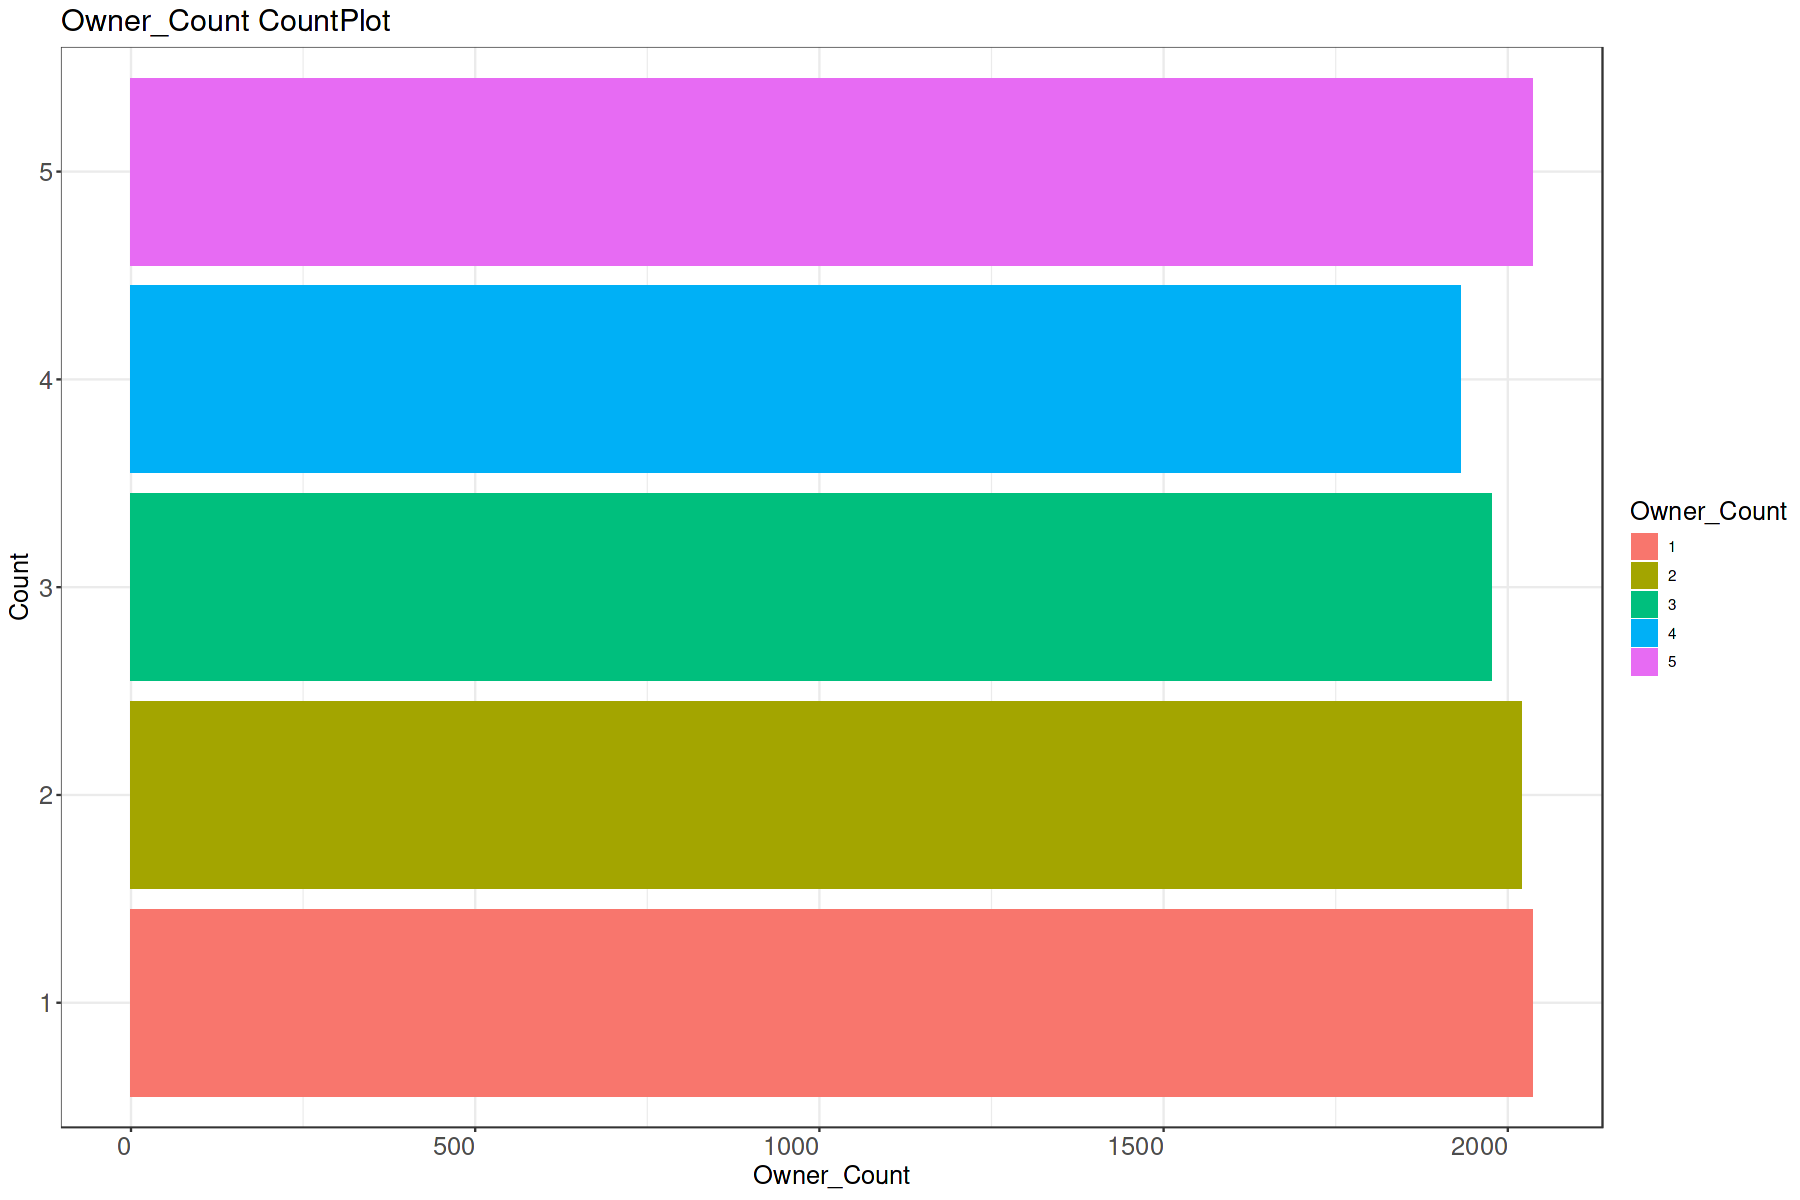

In [280]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)

for(i in cat_cols){
    a <- ggplot(df) + geom_bar(aes(y = df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1)      ,
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}

-----------------------------

## **Average Price by Brand**

In [281]:
Avg_price_brand <- df %>% group_by(Brand) %>%
                        summarize(Avg_price = mean(Price, na.rm = T))

In [282]:
Avg_price_brand

Brand,Avg_price
<fct>,<dbl>
Audi,8929.374
BMW,8704.068
Chevrolet,9015.684
Ford,8852.571
Honda,8665.597
Hyundai,8778.279
Kia,8880.086
Mercedes,8980.087
Toyota,8798.185


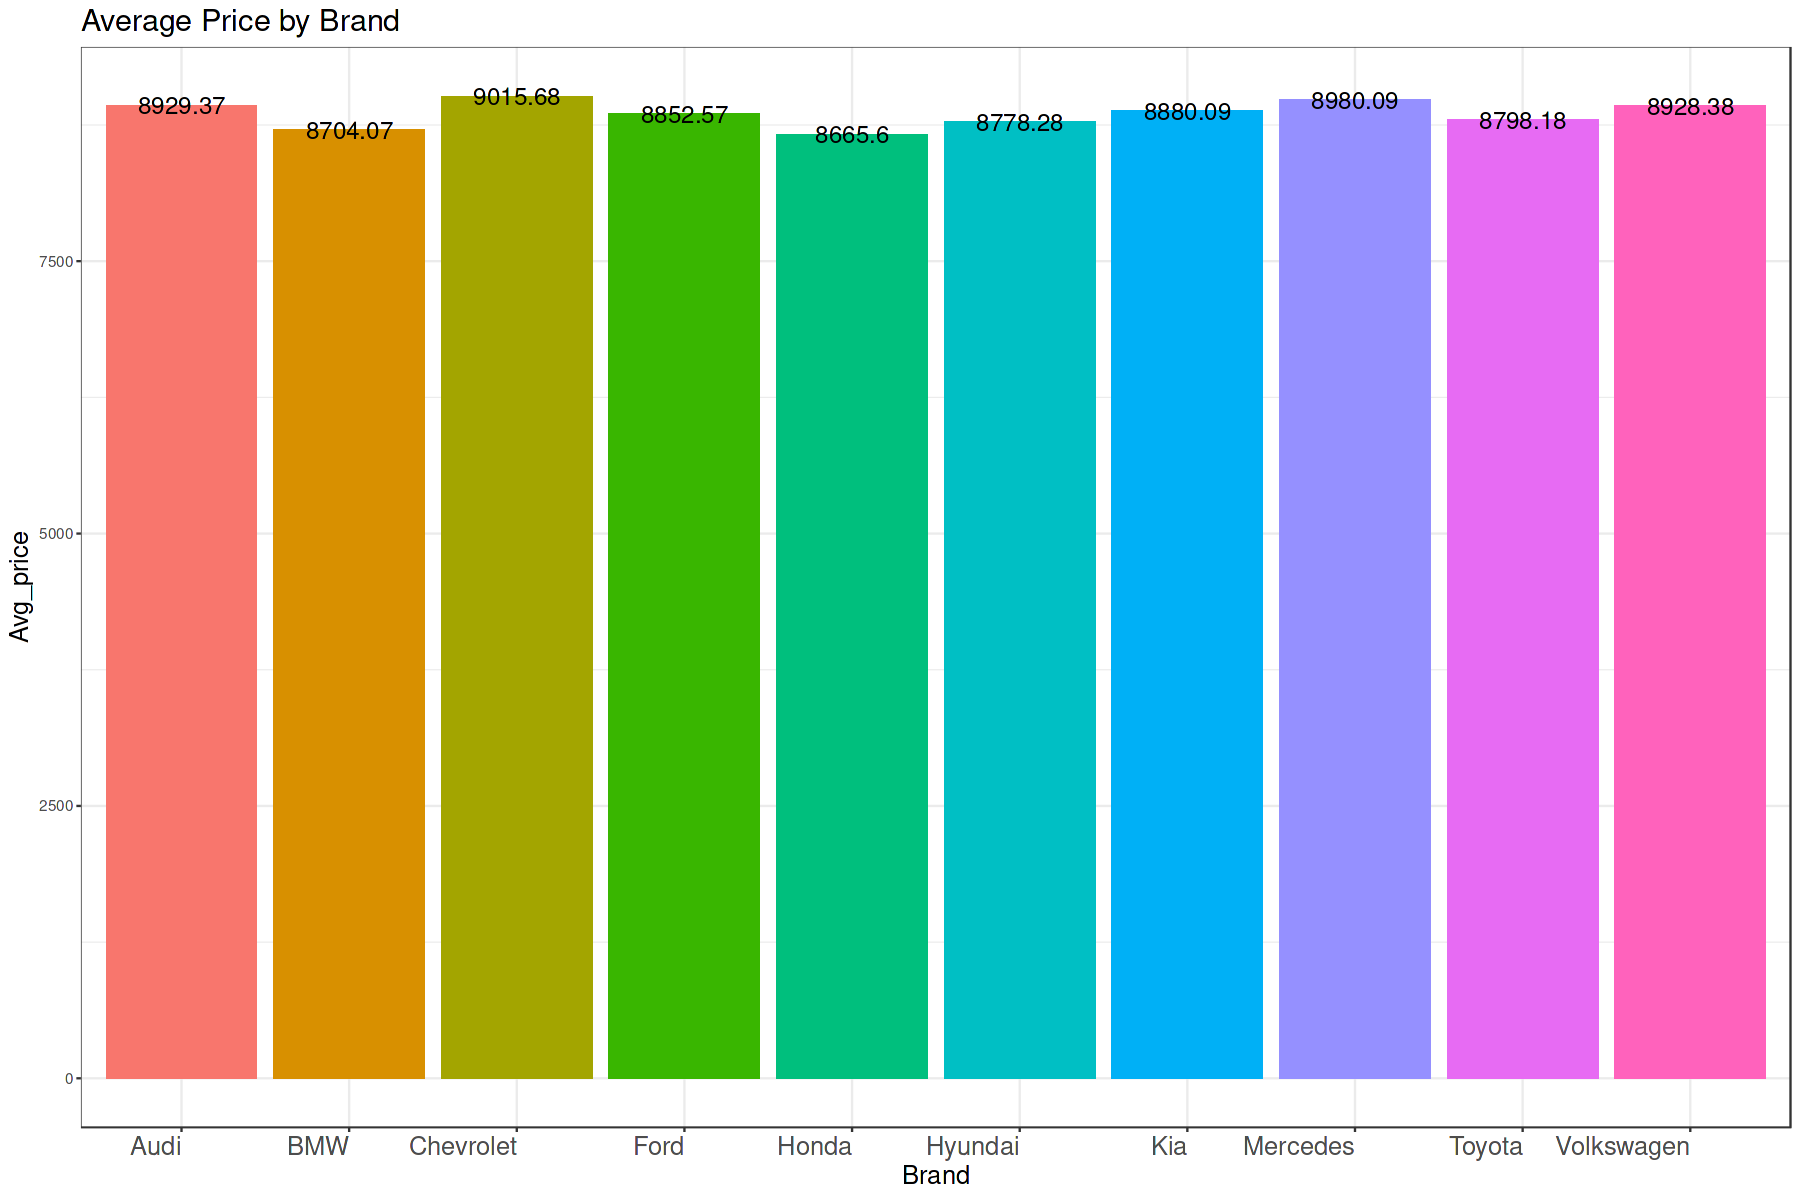

In [283]:
ggplot(Avg_price_brand) + geom_col(aes(x= Brand, y = Avg_price, fill = Brand)) + 
            geom_text(aes(x = Brand , y = Avg_price , label = round(Avg_price,2)),size = 5)+
            labs(title = 'Average Price by Brand', y = 'Avg_price') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

* **The average price of each brand is similar**

## **Average Price by Engine**

In [284]:
Avg_price_engine <- df %>% group_by(Fuel_Type) %>%
                        summarize(Avg_price = mean(Price, na.rm = T))

In [285]:
Avg_price_engine

Fuel_Type,Avg_price
<fct>,<dbl>
Diesel,8117.336
Electric,10032.220
Hybrid,9113.030
Petrol,8070.562


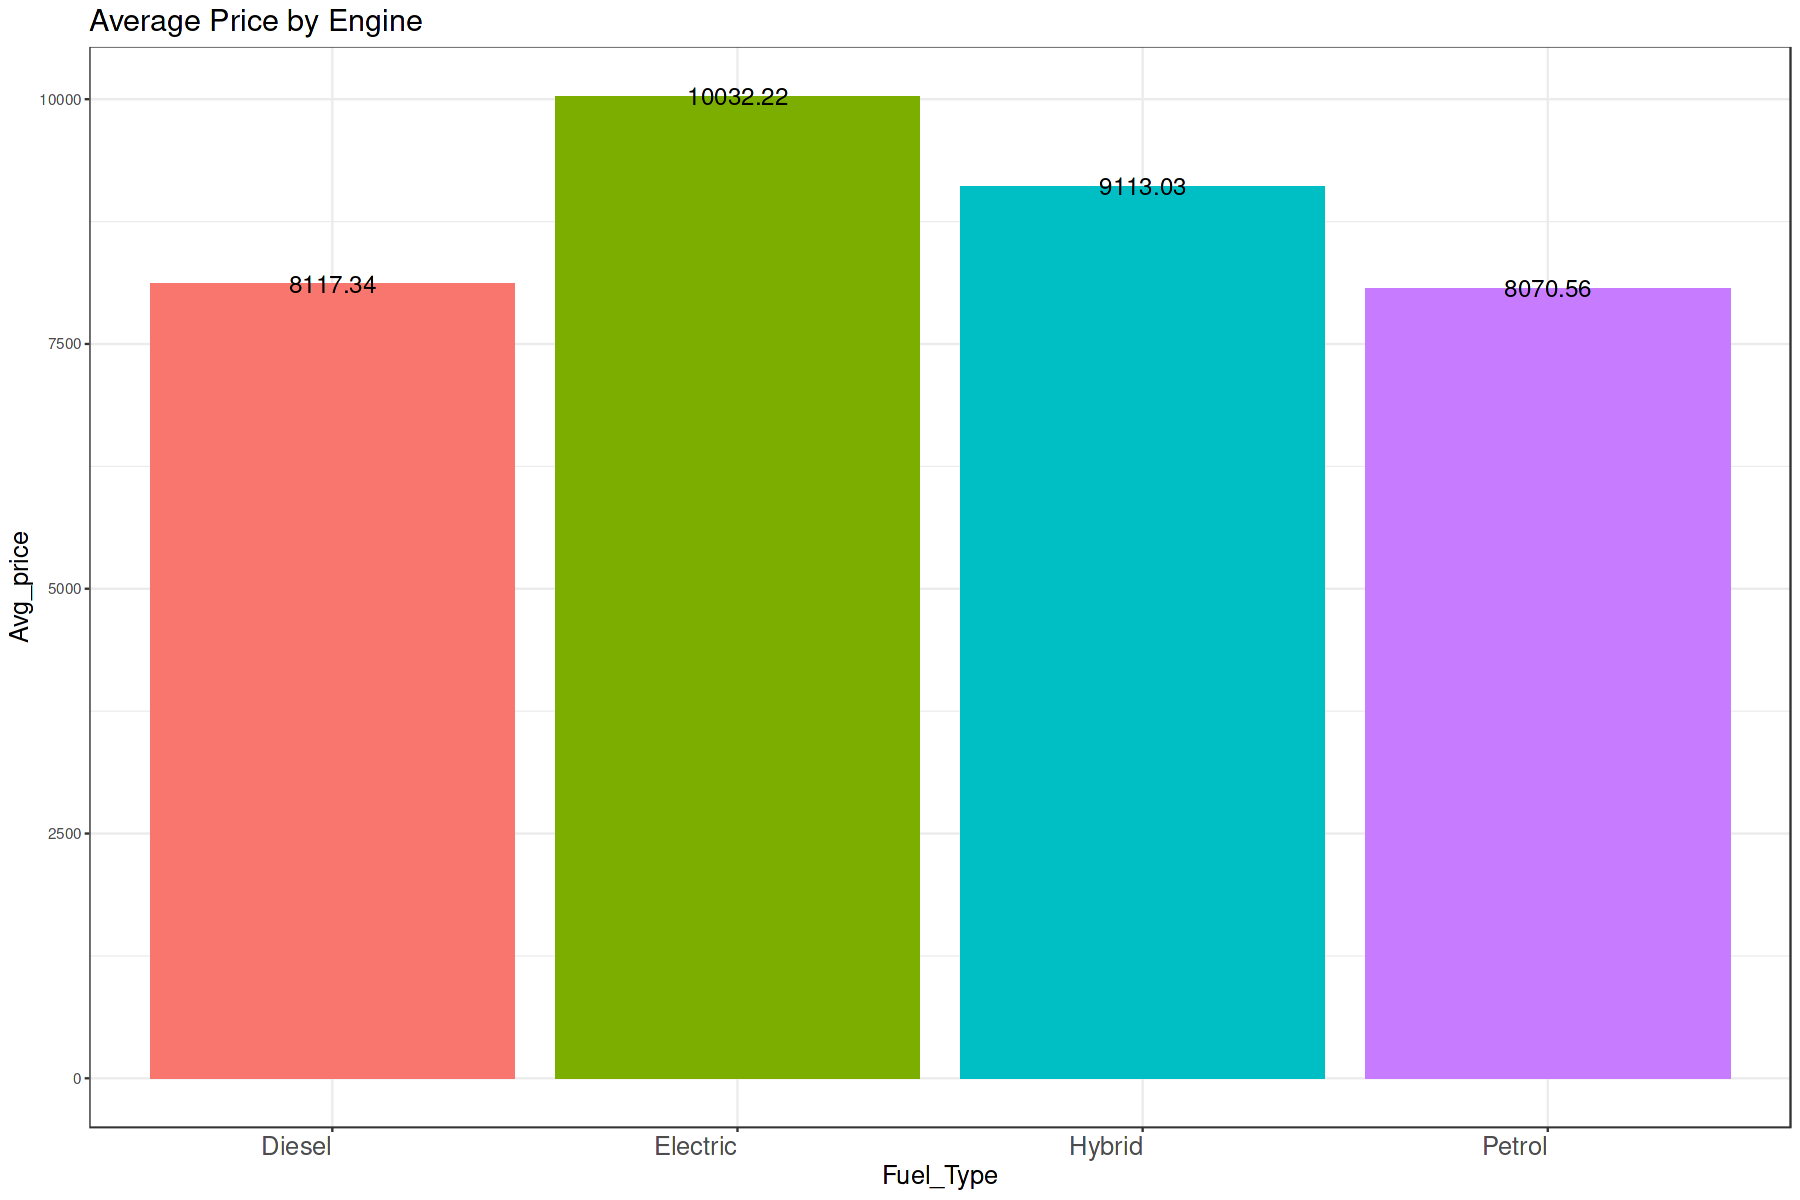

In [286]:
ggplot(Avg_price_engine) + geom_col(aes(x= Fuel_Type, y = Avg_price, fill = Fuel_Type)) + 
            geom_text(aes(x = Fuel_Type , y = Avg_price , label = round(Avg_price,2)),size = 5)+
            labs(title = 'Average Price by Engine', y = 'Avg_price') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

* **Electronic Engines have the highest average price.**

------------

# **3. Modeling**

**The models to be used are as follows.**
1. **Linear Regression**
2. **Regularized Linear Regression**
3. **Random Forest**
4. **Extreme Gradient Boosting**

------------

In [287]:
library(caret)
library(Metrics)

## **Preprocessing**

In [288]:
#df <- df %>% mutate(across(
#        c(
#      where(is.factor),
#        ),
#            ~ as.numeric(.x)
#       ))

## **Train Test Split**

In [289]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **5 FOLD**

In [290]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = Price)

## **Recipe**

In [291]:
rec <- recipes::recipe(Price ~ ., data = train) %>%
    recipes::step_dummy(all_nominal_predictors()) %>% 
    recipes::step_normalize(all_numeric_predictors()) %>%
    recipes::step_zv(all_predictors()) %>% 
    recipes::step_corr(all_predictors(), threshold = 0.8)

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 9



── Operations 

• Dummy variables from: all_nominal_predictors()

• Centering and scaling for: all_numeric_predictors()

• Zero variance filter on: all_predictors()

• Correlation filter on: all_predictors()



## **Linear Regression**

In [292]:
#Linear Model
lm_model <- parsnip::linear_reg()

#Linear Workflow
lm_wf <- workflow() %>% 
  add_recipe(rec) %>% 
  add_model(lm_model)

#Fit
lm_fit <- lm_wf %>% 
  fit(data = train)

#pred
lm_pred <- lm_fit %>% predict(new_data = test)

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


In [293]:
lm_mse <- mse(test$Price , lm_pred$.pred)
lm_rmse <- rmse(test$Price , lm_pred$.pred)
lm_mae <- mae(test$Price ,lm_pred$.pred)
lm_r2 <- R2(test$Price ,lm_pred$.pred)

In [294]:
lm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_mse,lm_rmse ,lm_mae, lm_r2 ))
lm_score

Indicators,Score
<chr>,<dbl>
MSE,4782.4354648
RMSE,69.1551550
MAE,21.0093895
R2,0.9995048


## **Regularized Linear Regression**

In [295]:
#Regularized Linear Model
lm_reg_model <- linear_reg(
  penalty = tune(),
  mixture = tune()
) %>% set_engine("glmnet") %>%
  set_mode("regression")

# Workflow
lm_reg_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(lm_reg_model)

#Tune
lm_reg_grid <- grid_regular(
  penalty(range = c(-3, 1)),
  mixture(range = c(0, 1))
)
lm_reg_tune <- tune_grid(
  lm_reg_wf,
  resamples = folds,
  grid = lm_reg_grid,
  metrics = metric_set(yardstick::rsq),
  control = control_grid(save_pred = TRUE)
)

# Select the best
best_lm_reg <- select_best(lm_reg_tune, metric = "rsq")
final_lm_reg <- finalize_workflow(lm_reg_wf, best_lm_reg)

# Fit
lm_reg_fit <- final_lm_reg %>% 
  fit(data = train)

# Predict
lm_reg_pred <- lm_reg_fit %>% 
  predict(new_data = test)

In [296]:
lm_reg_mse <- mse(test$Price , lm_reg_pred$.pred)
lm_reg_rmse <- rmse(test$Price , lm_reg_pred$.pred)
lm_reg_mae <- mae(test$Price ,lm_reg_pred$.pred)
lm_reg_r2 <- R2(test$Price ,lm_reg_pred$.pred)

In [298]:
lm_reg_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_reg_mse,lm_reg_rmse ,lm_reg_mae, lm_reg_r2))
lm_reg_score

Indicators,Score
<chr>,<dbl>
MSE,6588.1777711
RMSE,81.1675906
MAE,48.9440058
R2,0.9994615


## **RandomForest**

In [299]:
# RandomForest Model
rf_model <- rand_forest(
    mtry = tune(),
    trees = tune(),
    min_n = tune()
) %>% set_engine("ranger") %>% 
    set_mode("regression")

# Workflow
rf_wf <- workflow() %>% 
    add_recipe(rec) %>% 
    add_model(rf_model)

# Tune
rf_grid <- grid_random(
    mtry(range = c(1, ncol(train) - 1)),
    trees(range = c(100, 1000)),
    min_n(range = c(1, 10)),
    size = 10
)

# Apply Parallel Computing
num_cores <- parallel::detectCores() - 1
doParallel::registerDoParallel(cores = num_cores)
rf_tune <- tune_grid(
    rf_wf,
    resamples = folds,
    grid = rf_grid,
    metrics = metric_set(yardstick::rsq),
    control = control_grid(save_pred = TRUE)
)
doParallel::stopImplicitCluster() # Stop

# Select the best
best_rf <- select_best(rf_tune, metric = "rsq")
final_rf <- finalize_workflow(rf_wf, best_rf)

# Fit
rf_fit <- final_rf %>%
    fit(data = train)

# Predict
rf_pred <- rf_fit %>% 
  predict(new_data = test)

In [300]:
rf_mse <- mse(test$Price , rf_pred$.pred)
rf_rmse <- rmse(test$Price ,rf_pred$.pred)
rf_mae <- mae(test$Price ,rf_pred$.pred)
rf_r2 <- R2(test$Price ,rf_pred$.pred)

In [302]:
options(scipen = 100)

rf_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(rf_mse,rf_rmse ,rf_mae, rf_r2 ))
rf_score

Indicators,Score
<chr>,<dbl>
MSE,510931.9094372
RMSE,714.7950122
MAE,573.9993821
R2,0.9786482


## **XGB**

In [308]:
# Model
xgb <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", ) %>%
  set_mode(mode = "regression")

# Workflow
xgb_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(xgb)

# params
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

#Controol
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

#Tune
xgb_tune <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(rsq),
  param_info = params
)

# Select the best
best_xgb <- select_best(xgb_tune, metric = "rsq")
final_xgb <- finalize_workflow(xgb_wf, best_xgb)

# Fit
xgb_fit <- final_xgb %>% 
  fit(data = train)

# Predict
xgb_pred <- xgb_fit %>% 
  predict(new_data = test)

In [309]:
xgb_mse <- mse(test$Price , xgb_pred$.pred)
xgb_rmse <- rmse(test$Price ,xgb_pred$.pred)
xgb_mae <- mae(test$Price ,xgb_pred$.pred)
xgb_r2 <- R2(test$Price ,xgb_pred$.pred)

In [310]:
xgb_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(xgb_mse,xgb_rmse ,xgb_mae, xgb_r2 ))
xgb_score

Indicators,Score
<chr>,<dbl>
MSE,30771.1938317
RMSE,175.4171994
MAE,135.8021367
R2,0.9973548


-----------

# **4. Evaluation**

In [313]:
#overall score
overall_score <- data.frame(Model = c('Linear','Reg_Linear','RF','Xgb'), 
                            RMSE_Score = c(lm_rmse,lm_reg_rmse ,rf_rmse, xgb_rmse),
                            R2_Score = c(lm_r2,lm_reg_r2 ,rf_r2, xgb_r2))

In [314]:
overall_score

Model,RMSE_Score,R2_Score
<chr>,<dbl>,<dbl>
Linear,69.15516,0.9995048
Reg_Linear,81.16759,0.9994615
RF,714.79501,0.9786482
Xgb,175.41720,0.9973548


**1. Linear Model has low RMSE and RF Model has high RMSE.**   
**Therefore, Linear Model is Best Model.**    

**2. If the R2 score is low, it means that the model does not explain the data well.**   
**However, All models have high R2 scores, which means that the model describes the data well.**   

-----------------------

**Thankyou. Please leave your advice in the comments**